There are four cases were three variables need to be plotted toger:

* There are three numeric variables
* There are two numeric and one categorical variables
* There is one categorical and two numeric variables
* There are three categorical variables.

When there are two numeric variables (the first two cases), non-positional encodings care great. Three main non positional encodings include:

* Marker Color
* Marker Shape
* Marker Size

# Import Libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'

# Load Dataset

In [33]:
df = pd.read_csv('fuel-econ.csv')

## Creating a transmission type column

In [34]:
df['trans_type'] = df['trans'].apply(lambda x:x.split()[0])


## Getting a random susbet from the dataset

In [35]:
np.random.seed(2018)

sample = np.random.choice(df.shape[0], 200, replace=False)
df_subset = df.loc[sample]

# Encoding with Color

## Plot 1: Fuel Effeciency and Transmission Type

''

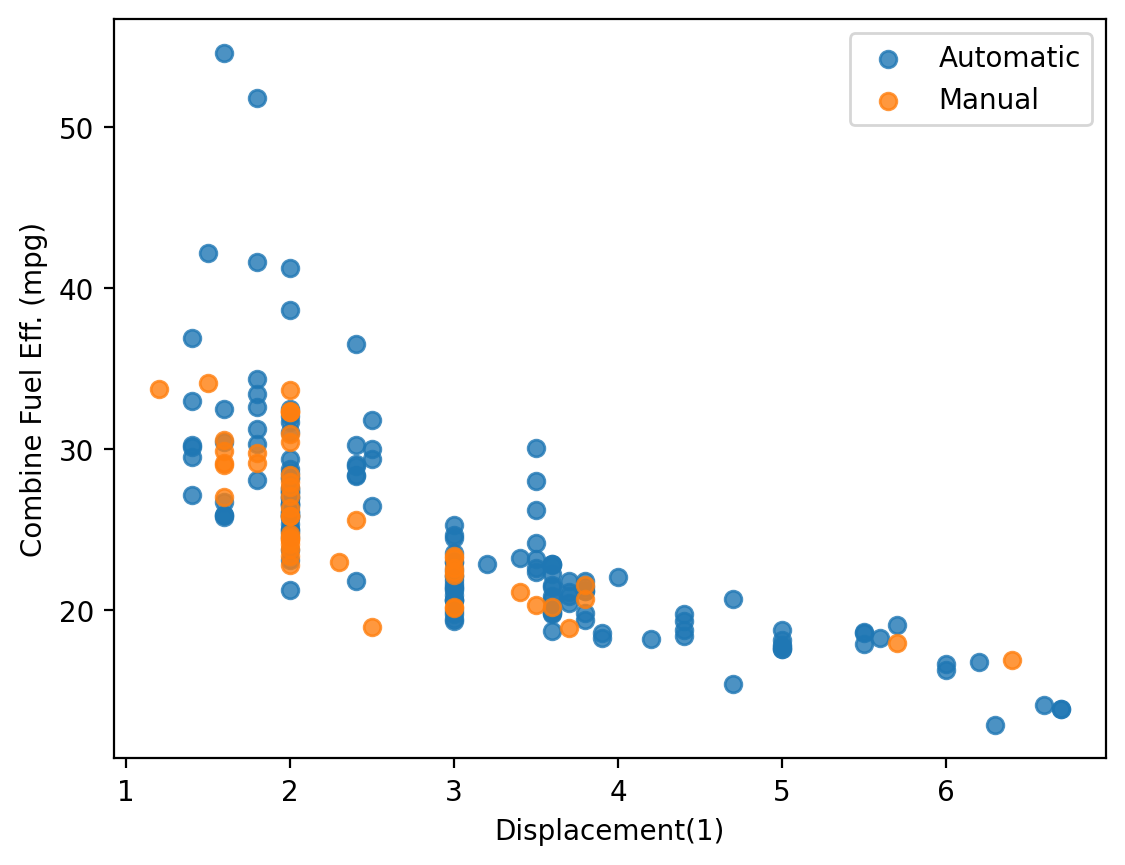

In [36]:
ttype_markers = [['Automatic', 'o'],
                ['Manual','o']]

for ttype, marker in ttype_markers:
    plot_data = df_subset.loc[df_subset['trans_type'] == ttype]
    sns.regplot(data=plot_data, x='displ', y='comb', fit_reg=False, marker=marker);

plt.xlabel('Displacement(1)')
plt.ylabel("Combine Fuel Eff. (mpg)")
plt.legend(['Automatic','Manual'])
;

## Plot 2: Fuel Efficiency and CO2 Emissions

''

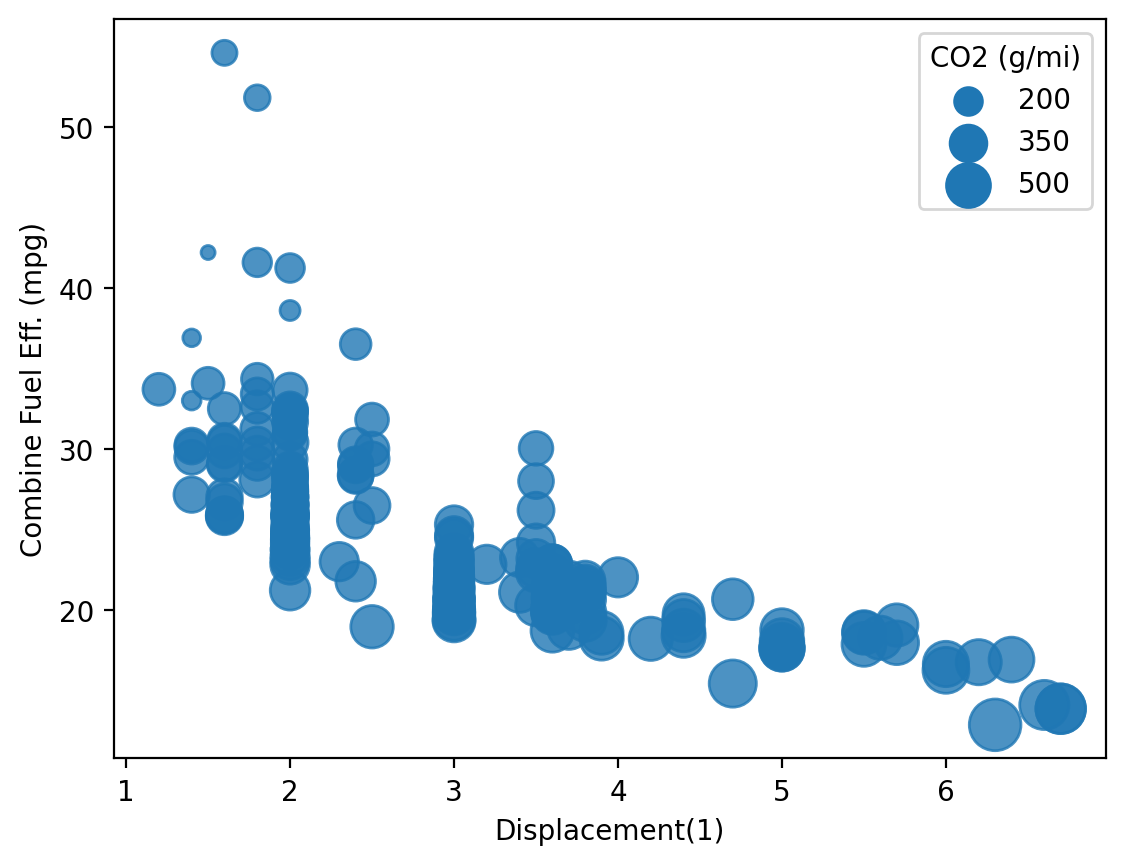

In [37]:
sns.regplot(data=df_subset, x='displ', y='comb', fit_reg=False, scatter_kws={'s': df_subset['co2']/2})#Size of each marker is half the value of the point
plt.xlabel('Displacement(1)')
plt.ylabel('Combine Fuel Eff. (mpg)');

sizes = [200, 350, 500]
legend_obj = []

for s in sizes:
    legend_obj.append(plt.scatter([], [], s=s/2, color='tab:blue'))

plt.legend(legend_obj, sizes, title = 'CO2 (g/mi)')
;

# Encoding with Shape

''

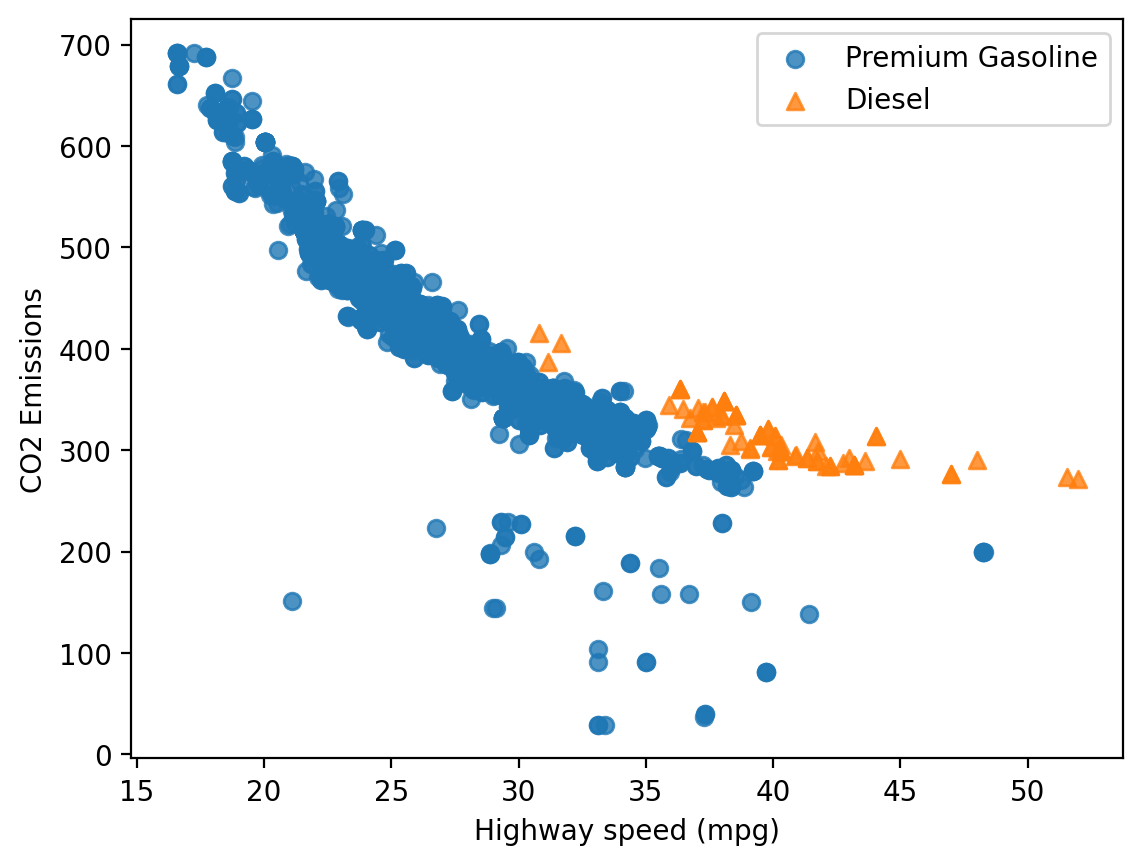

In [38]:
ttype_markers = [['Premium Gasoline', 'o'],
                ['Diesel','^']]

for ttype, marker in ttype_markers:
    plot_data = df.loc[df['fuelType'] == ttype]
    sns.regplot(data=plot_data, x='highway', y='co2', fit_reg=False, marker=marker);

plt.xlabel('Highway speed (mpg)')
plt.ylabel("CO2 Emissions")
plt.legend(['Premium Gasoline','Diesel'])
;

* `'o'` specifies circle markers
* `'s'` specifies square markers
* `'^'` specifies triangle markers

# Encoding with Size

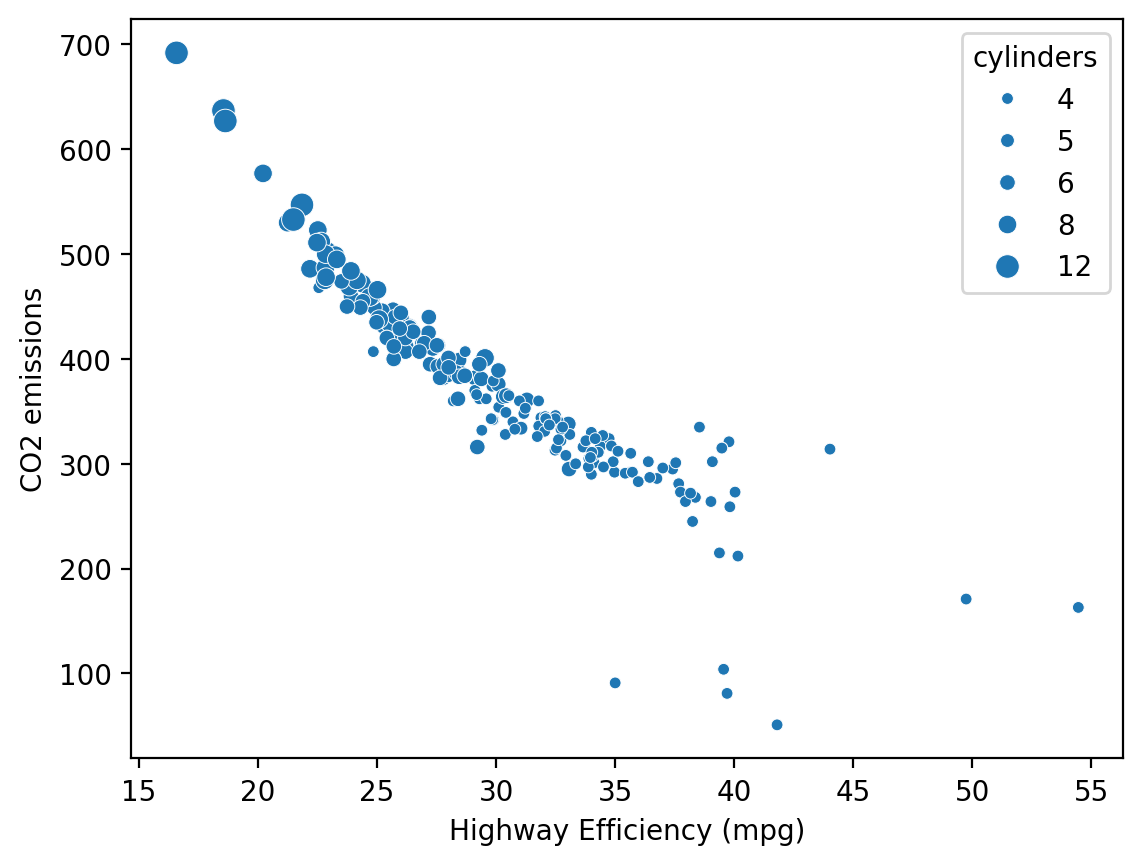

In [39]:
sns.scatterplot(data=df_subset, x='highway', y='co2', size='cylinders',color="tab:blue")
plt.xlabel('Highway Efficiency (mpg)')
plt.ylabel('CO2 emissions');

# Some Encodings

([], [])

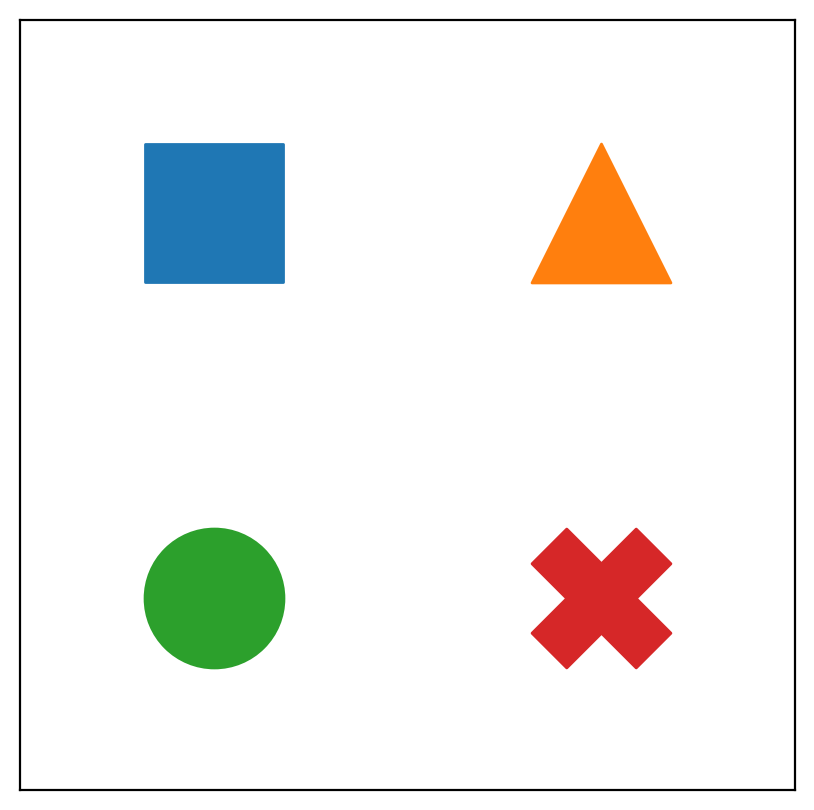

In [40]:
plt.figure(figsize = [5,5])

common_size = 2500
plt.scatter([0],[1], marker='s', s=common_size)
plt.scatter([1],[1], marker='^', s=common_size)
plt.scatter([0],[0], marker='o', s=common_size)
plt.scatter([1],[0], marker='X', s=common_size)

# a little bit of aesthetic cleaning
plt.xlim(-0.5,1.5)
plt.xticks([])
plt.ylim(-0.5,1.5)
plt.yticks([])